In [16]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import * 
from text_embedding import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
#classification training me ksena testing me ellinika

#training kai testing me ola ta data kai 0.2 split
#load training datasets training ta panta - testing me ta ellininka
train1 = pd.read_csv('../data/fullfacts_emb.csv')
train3 = pd.read_csv('../data/snopes2_emb.csv', nrows=1000)
train4 = pd.read_csv('../data/reuters_emb.csv')
test1 = pd.read_csv('../data/greek_web_scraping_emb.csv')
test2 = pd.read_csv('../data/postgres.csv')

train1 = unravel_df(train1, ['text_embedding'])
test1 = unravel_df(test1, ['text_embedding'])
test2 = unravel_df(test2, ['text_embedding'])
train3 = unravel_df(train3, ['text_embedding'])
train4 = unravel_df(train4, ['text_embedding'])

In [18]:
train_df = pd.concat([train1,train3,train4], ignore_index=True)
test_df = pd.concat([test1,test2], ignore_index=True)

In [19]:
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [21]:
train_df = train_df[train_df.label<=2]

In [22]:
X_train = [train_df.iloc[i,2] for i in range(len(train_df))]
y_train = np.array(train_df.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)

In [23]:
train_df.label.value_counts(), test_df.label.value_counts()

(0.0    1641
 1.0     631
 2.0     242
 Name: label, dtype: int64,
 1    359
 0    298
 2     17
 Name: label, dtype: int64)

In [24]:
if train_df['label'].isnull().any():
    print("Column 'column1' contains null values.")


In [25]:
if test_df['label'].isnull().any():
    print("Column 'column1' contains null values.")

In [33]:
train_df.shape, test_df.shape

((2514, 4), (674, 4))

Model Accuracy: 0.611

Model Recall: 0.611

Model Precision: 0.782

Model F1-Score: 0.651

Cross validation score: [0.429 0.512 0.448 0.413 0.546 0.57  0.538 0.653 0.622 0.681]

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55       298
           1       0.73      0.80      0.76       359
           2       0.05      0.41      0.08        17

    accuracy                           0.61       674
   macro avg       0.55      0.54      0.47       674
weighted avg       0.78      0.61      0.65       674




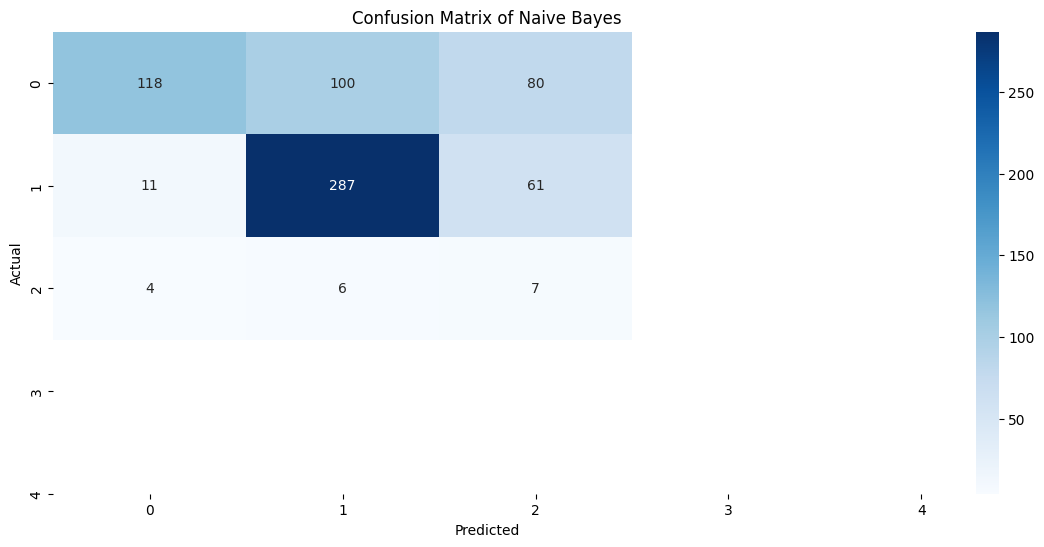

In [26]:
NaiveBayes(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.826

Model Recall: 0.826

Model Precision: 0.806

Model F1-Score: 0.816

Cross validation score: [0.655 0.651 0.651 0.647 0.896 0.9   0.892 0.857 0.884 0.873]

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       298
           1       0.85      0.87      0.86       359
           2       0.00      0.00      0.00        17

    accuracy                           0.83       674
   macro avg       0.55      0.56      0.56       674
weighted avg       0.81      0.83      0.82       674




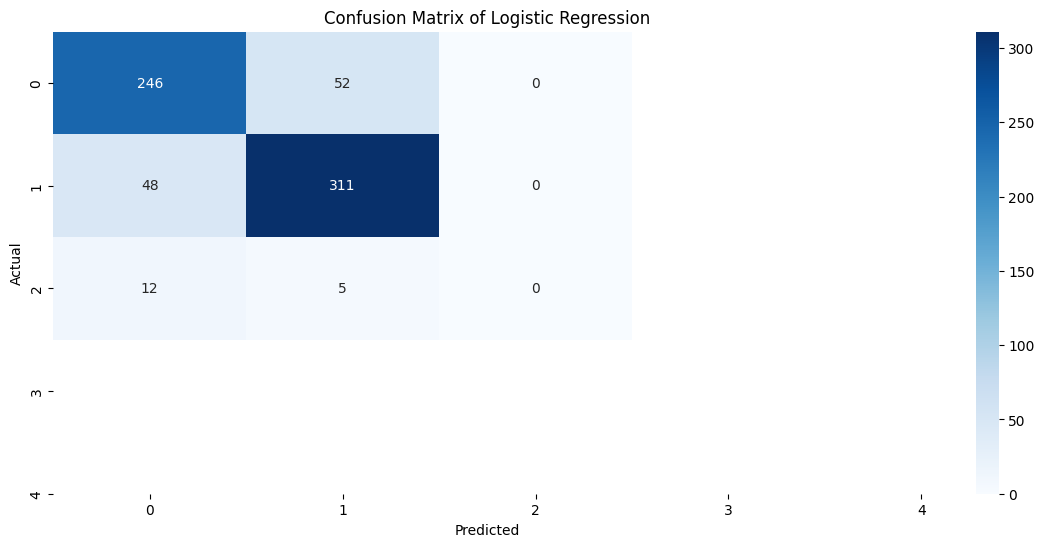

In [27]:
LogisticReg(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.838

Model Recall: 0.838

Model Precision: 0.817

Model F1-Score: 0.827

Cross validation score: [0.651 0.651 0.651 0.647 0.896 0.904 0.9   0.892 0.9   0.896]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       298
           1       0.84      0.89      0.87       359
           2       0.00      0.00      0.00        17

    accuracy                           0.84       674
   macro avg       0.56      0.57      0.56       674
weighted avg       0.82      0.84      0.83       674




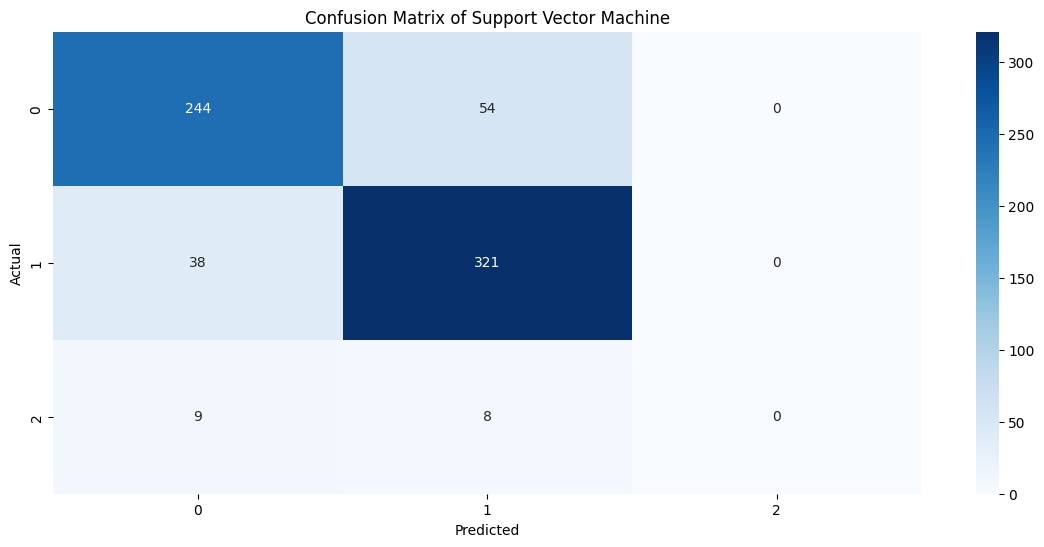

In [28]:
SVM(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.671

Model Recall: 0.671

Model Precision: 0.721

Model F1-Score: 0.658

Cross validation score: [0.663 0.675 0.659 0.631 0.805 0.821 0.785 0.729 0.797 0.709]

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.90      0.71       298
           1       0.86      0.51      0.64       359
           2       0.17      0.06      0.09        17

    accuracy                           0.67       674
   macro avg       0.54      0.49      0.48       674
weighted avg       0.72      0.67      0.66       674




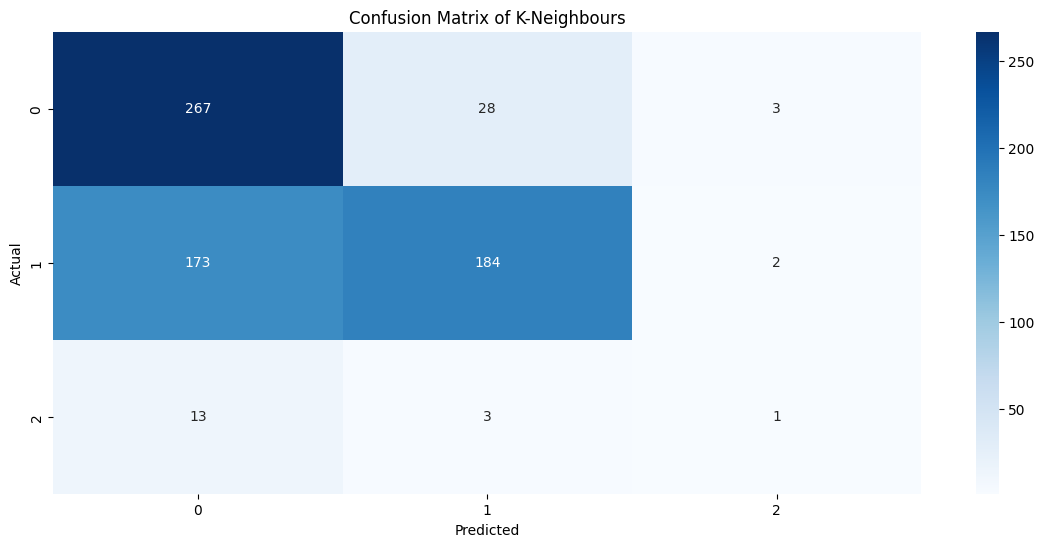

In [29]:
KNeigh(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.727

Model Recall: 0.727

Model Precision: 0.755

Model F1-Score: 0.714

Cross validation score: [0.655 0.651 0.655 0.647 0.865 0.861 0.876 0.857 0.865 0.845]

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75       298
           1       0.89      0.60      0.72       359
           2       0.00      0.00      0.00        17

    accuracy                           0.73       674
   macro avg       0.51      0.51      0.49       674
weighted avg       0.75      0.73      0.71       674




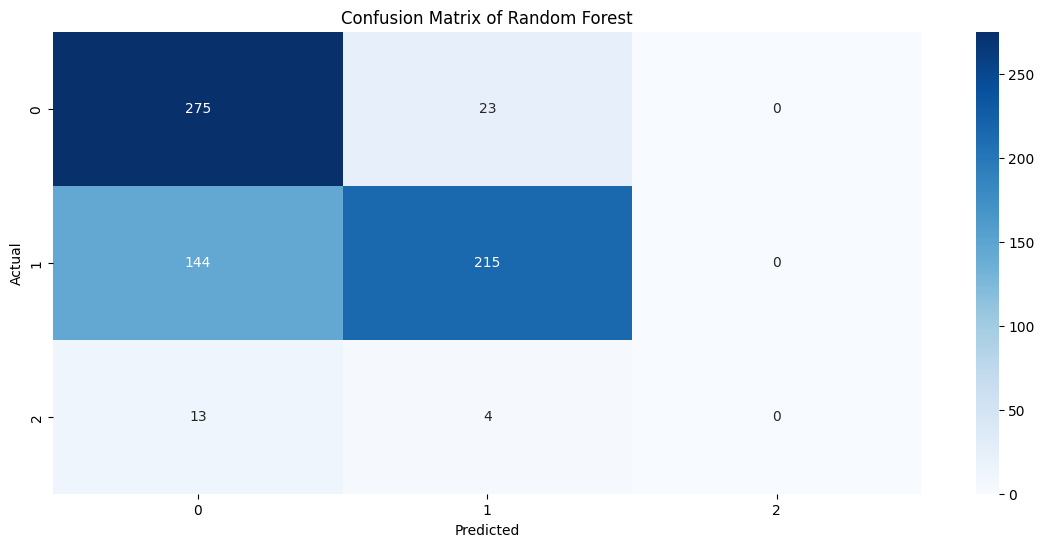

In [30]:
RandomForest(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.613

Model Recall: 0.613

Model Precision: 0.674

Model F1-Score: 0.64

Cross validation score: [0.552 0.536 0.56  0.532 0.661 0.665 0.677 0.629 0.61  0.637]

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       298
           1       0.73      0.63      0.68       359
           2       0.04      0.18      0.06        17

    accuracy                           0.61       674
   macro avg       0.47      0.47      0.46       674
weighted avg       0.67      0.61      0.64       674




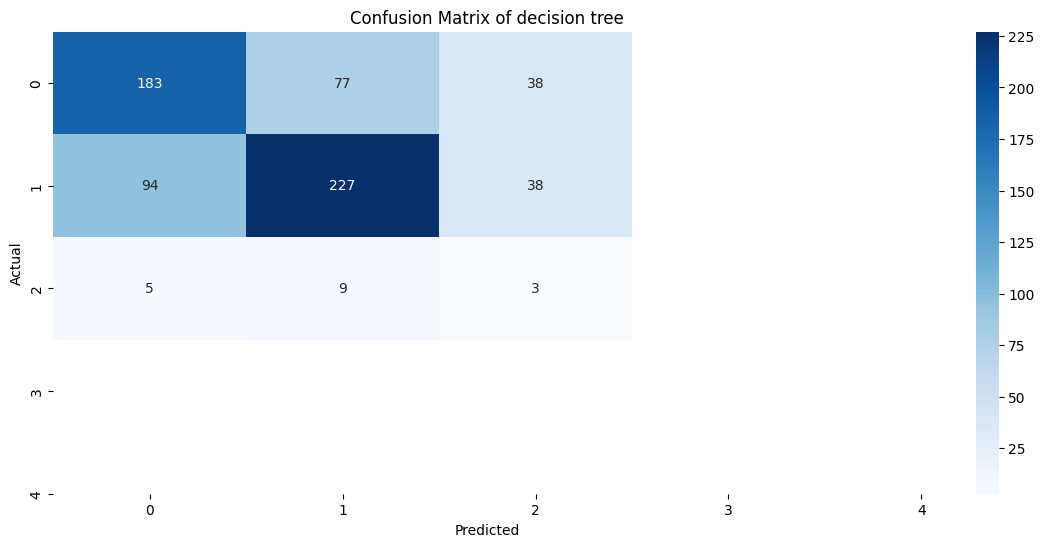

In [31]:
DecisionTree(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.743

Model Recall: 0.743

Model Precision: 0.773

Model F1-Score: 0.745

Cross validation score: [0.643 0.643 0.611 0.635 0.741 0.729 0.781 0.693 0.733 0.713]

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.60      0.70       298
           1       0.75      0.90      0.81       359
           2       0.03      0.06      0.04        17

    accuracy                           0.74       674
   macro avg       0.54      0.52      0.52       674
weighted avg       0.77      0.74      0.74       674




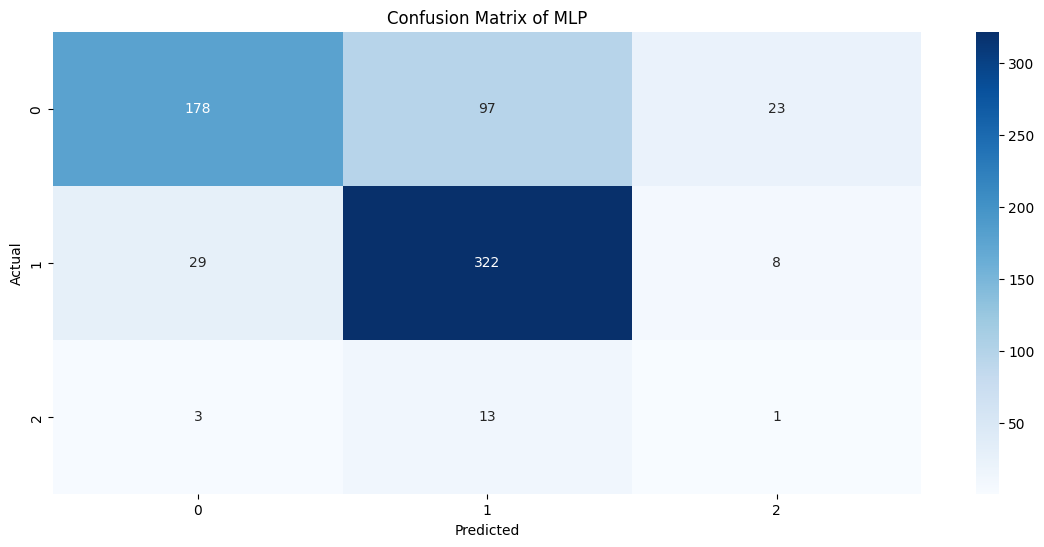

In [32]:
MLP(X_train, X_test, y_train, y_test)   